In [ ]:
 %pip install pybaseball

Make sure to have the kaggle dataset downloaded: https://www.kaggle.com/datasets/eddiedew/sports-analytics-savant-data

In [1]:
import pybaseball
import pandas as pd

In [9]:
final = pd.concat([data_2022, data_2023, data_2024])

In [12]:
final = final[final['game_type'] == 'R'].reset_index(drop=True)

In [2]:
savant = pd.read_csv('./2022-2024-savant.csv')

In [4]:
savant.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [13]:
savant.groupby('pitch_name')['release_speed'].describe()

,count,mean,std,min,25%,50%,75%,max
pitch_name,,,,,,,,
4-Seam Fastball,692123.0,94.129435,2.506797,70.4,92.50,94.20,95.8,105.5
Changeup,229985.0,85.406496,3.383232,40.2,83.20,85.60,87.8,98.0
Curveball,148865.0,79.053403,3.704301,36.1,76.80,79.40,81.5,92.8
Cutter,166536.0,89.308350,3.265170,53.4,87.20,89.00,91.1,104.0
Eephus,1623.0,49.501417,7.603955,31.9,43.80,49.40,54.5,80.4
Forkball,926.0,82.818359,1.759142,75.4,81.60,82.90,84.1,88.2
Knuckle Curve,42014.0,81.668313,3.435266,63.7,79.10,81.70,84.2,94.2
Knuckleball,1182.0,76.377750,5.276361,46.9,75.20,77.30,79.1,84.2
Other,3032.0,68.009334,10.098056,34.3,60.40,67.40,75.6,95.1


In [19]:
(savant['pitch_name'].value_counts() / len(savant)).sort_values(ascending=False)

pitch_name
4-Seam Fastball    0.324032
Slider             0.165978
Sinker             0.155322
Changeup           0.107674
Cutter             0.077969
Curveball          0.069694
Sweeper            0.049472
Split-Finger       0.022778
Knuckle Curve      0.019671
Slurve             0.003552
Other              0.001419
Eephus             0.000760
Knuckleball        0.000553
Forkball           0.000434
Screwball          0.000109
Slow Curve         0.000080
Pitch Out          0.000066
Name: count, dtype: float64

In [23]:
pitches_wanted = ['4-Seam Fastball', 'Slider', 'Sinker', 'Changeup']

In [15]:
savant[savant['release_speed'] == 105.5]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
1528768,FF,2024-09-03,105.5,-1.87,5.28,"Joyce, Ben",669242,690829,strikeout,swinging_strike,...,2,2,2,Strategic,Standard,228.0,0.032,-0.061,71.65858,6.39825


<Axes: xlabel='plate_x', ylabel='plate_z'>

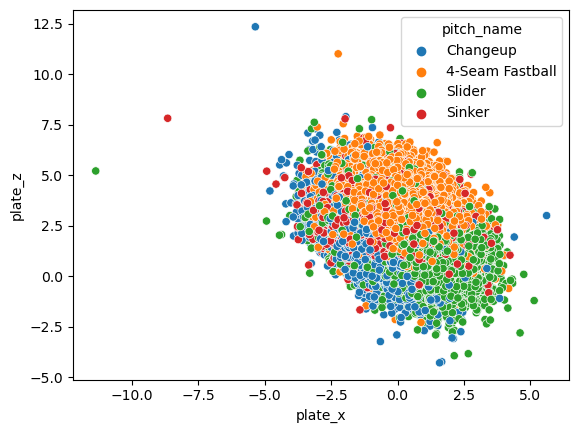

In [26]:
import seaborn as sns
subset = savant[(savant['pitch_name'].isin(pitches_wanted)) & (savant['p_throws'] == 'R')]

sns.scatterplot(x='plate_x', y='plate_z', data = subset, hue='pitch_name')

In [28]:
savant.groupby('pitch_name')['release_spin_rate'].mean().sort_values(ascending=False)

pitch_name
Sweeper            2568.818620
Curveball          2546.788246
Slurve             2533.366733
Knuckle Curve      2464.361855
Slider             2412.484571
Cutter             2384.478090
4-Seam Fastball    2284.095837
Slow Curve         2266.178571
Pitch Out          2200.164286
Sinker             2146.630079
Screwball          2065.241379
Changeup           1781.509929
Other              1664.913490
Split-Finger       1343.089371
Eephus             1215.813695
Forkball           1061.010941
Knuckleball         284.344203
Name: release_spin_rate, dtype: float64